> **Created by**: Hadi Najar

# Project: TMDB-Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this Project, I will be looking at the IMDB Movie data. I will inspect the data, perform data wrangling, data cleaning and answer a few questions such as:
>
> 1- Which genres are most popular from year to year?
>
> 2- which kind of properties are associated with movies that have high revenues? Do popular movies have higher revenues?


In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter #needed for counting

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set() #set sns to default for now


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Loading data and inspecting it
df=pd.read_csv("tmdb-movies.csv") # read the file using pandas and convert to a DataFrame

df.shape #Inspect the size of the dataframe

(10866, 21)

In [3]:
df.dtypes #Observing what sort of data I have to deal with

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
df.duplicated().sum() #check for duplicates

1

In [5]:
df.isnull().sum() #inspect for nulls

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
for col in df.columns: # look at the columns nicely and see which ones are useful to look at.
    print(col)     

id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj


> In this Section I will be cleaning my data

### Data Cleaning

In [7]:
df.drop_duplicates(inplace = True) # drop the duplicated row
df.duplicated().sum() # check to see if athe duplicated row is dropped.

0

In [8]:
# Drop the missing genres data (there are not that many compared to the data set size)
# df["genres"].dropna(axis = 0, inplace = True) #why doesnt this work?
df.dropna(subset=['genres'], inplace = True)
df.isna().sum() #inspect for nulls - making sure genres have not na

id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7911
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> Now that my data is somewhat clean I will try to answer the posed questions.

### Which genres are most popular from year to year?

> The 'genres' column is still a bit messy. It needs to be cleaned up and see what genres types we have.

In [9]:
gen = df['genres'].apply(lambda x: x.split("|")) # create a list of all the genres split by "|"


In [10]:
list_ = []  # create an empty list
# the following three lines of code will cycle through "gen", split the lists into one list 
for _ in gen:
    for elec in _:
        list_.append(elec) #all the genre categories are now listed in list_

In [11]:
dict_ = dict(Counter(list_)) # create a dictionary to count how many different genres we have and their frequency
df_genre = pd.DataFrame.from_dict(dict_, orient='index', columns=['frequency']) #turn the dict into a df for better handing and visualization
df_genre.head() #Having a peek at the df_genre

,frequency
Action,2384
Adventure,1471
Science Fiction,1229
Thriller,2907
Fantasy,916


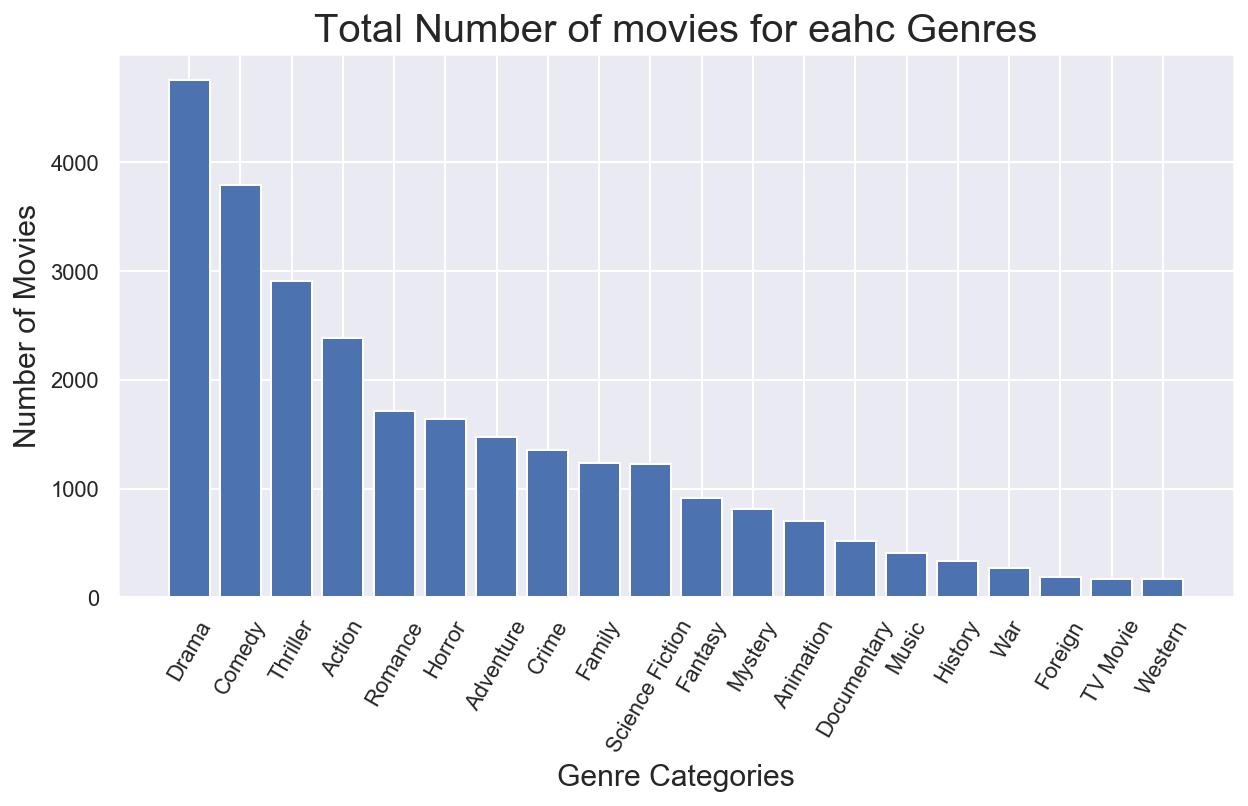

In [12]:
#Let's plot for better visualization
df_genre = df_genre.sort_values('frequency', ascending = False) #let's sort them in ascending order for nicer bar plot
plt.subplots(figsize=(10,5)) #determining the size of the plot
plt.bar(df_genre.index, df_genre.frequency) #create a bar plot
plt.xticks(rotation=60) # rotate the x ticks to avoid text messiness

plt.title("Total Number of movies for eahc Genres", fontsize = 20)
plt.xlabel("Genre Categories", fontsize = 15)
plt.ylabel("Number of Movies", fontsize = 15);

> Based on the above bar chart, most movies are Drama followed by Comedy, Thriller and Action. Let's look into that a bit more.

In [31]:
#define a function to return the year and genre count
#Input: genre type, string
#output: dataframe with year and genre_count column. year col is sorted in ascending order and df is reindexed. 
def genre_count(genre_type):
    genre_result = df.genres.str.contains(pat = genre_type)
    list_1 = [] #count
    list_2 = [] #year 
    for _ in df.release_year.unique():
        list_1.append(_)
        list_2.append(df[(df.release_year) == _].genres[genre_result].count())
    return pd.DataFrame(list(zip(list_1,list_2)), columns = ['year', genre_type]).sort_values('year', ascending = False).reset_index(drop=True)


In [34]:
df_genre_mod = genre_count('Drama') # create df genre modified
for _ in df_genre.index: #merge all the DFs in to one 
    df_genre_mod = pd.merge(df_genre_mod, genre_count(_))
df_genre_mod.head() #lookst the head

,year,Drama,Comedy,Thriller,Action,Romance,Horror,Adventure,Crime,Family,...,Fantasy,Mystery,Animation,Documentary,Music,History,War,Foreign,TV Movie,Western
0,2015,260,162,171,107,57,125,69,51,44,...,33,42,39,57,33,15,9,0,20,6
1,2014,284,185,179,129,84,105,67,65,43,...,36,36,36,73,28,15,23,0,14,6
2,2013,253,175,175,121,65,102,67,71,48,...,39,38,42,62,30,14,7,0,10,3
3,2012,232,176,160,99,79,104,50,54,42,...,34,33,40,49,22,13,10,6,14,4
4,2011,214,172,146,115,75,78,62,48,72,...,46,38,46,49,17,8,9,14,10,3


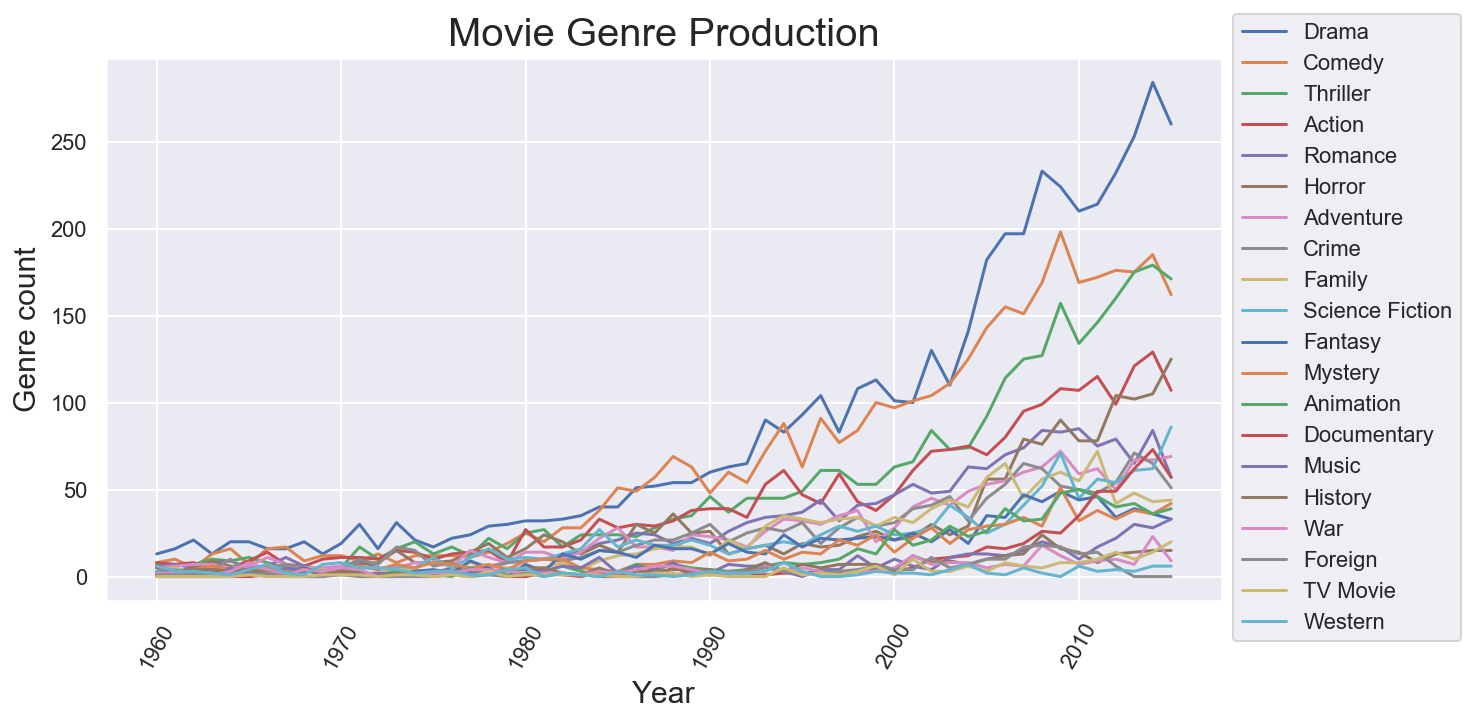

In [36]:
plt.figure(figsize=(10,5)) # determine the figure size

for _ in df_genre_mod.columns[1:]:
    plt.plot(df_genre_mod.year, df_genre_mod[_]) #plot all the genre counts at each year

plt.title("Movie Genre Production", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Genre count", fontsize = 15)
plt.xticks(rotation=60) # rotate the x ticks to avoid text messines
plt.legend(df_genre_mod.columns[1:], bbox_to_anchor=(1.0, 1.1)); # put the legend on the side for better visualization

> It looks like the production of almost all the genres have increased in general, however, "Drama" genre production have increased more than the other genres. Now Let's look at popularity.

### What kinds of properties are associated with movies that have high revenues?
> I will be looking only at a few. I will investigate runtime, budget and popularity.

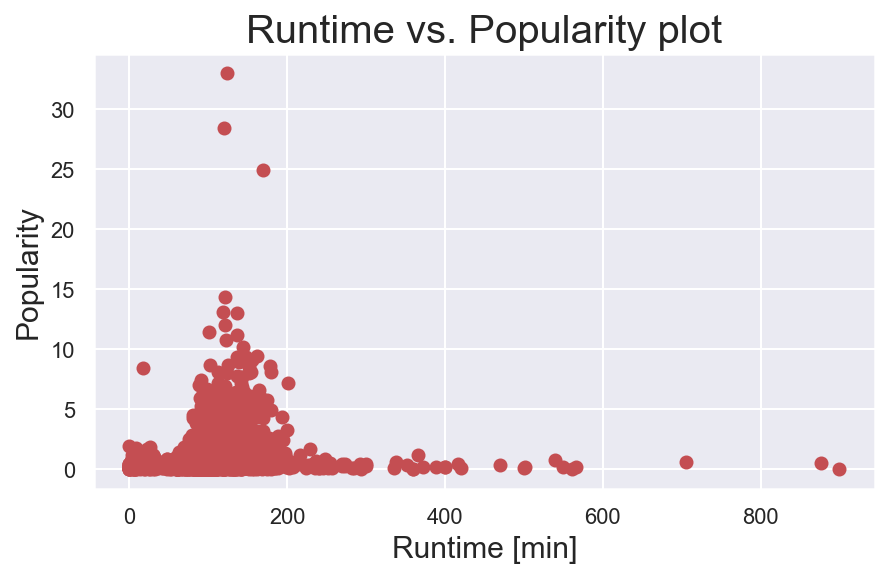

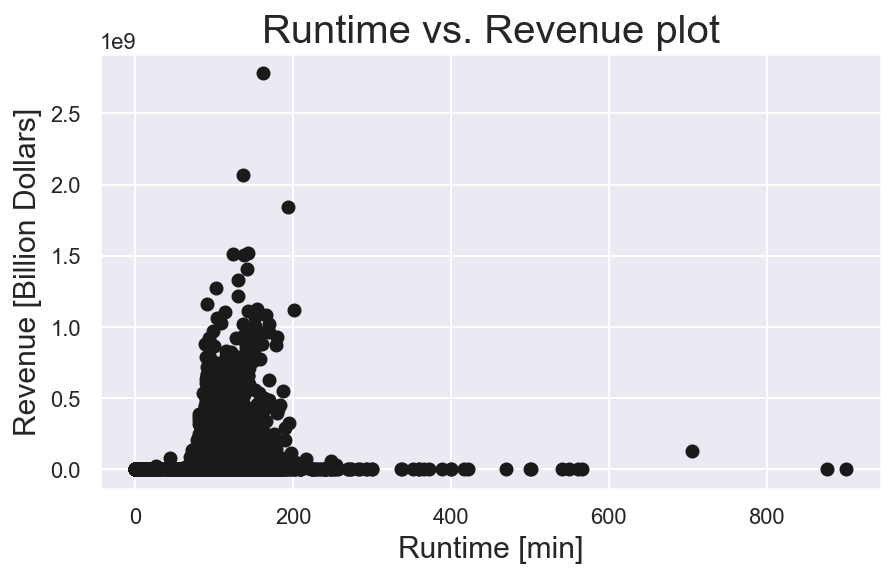

In [20]:
#Lets present some scatter plot on popularity vs runtime
plt.figure(figsize=(7,4))
plt.plot(df.runtime, df.popularity, 'ro');
plt.title("Runtime vs. Popularity plot", fontsize = 20)
plt.xlabel("Runtime [min]", fontsize = 15)
plt.ylabel("Popularity", fontsize = 15);

#Plotting revenue vs. runtime
plt.figure(figsize=(7,4))
plt.plot(df.runtime, df.revenue, 'ko');
plt.title("Runtime vs. Revenue plot", fontsize = 20)
plt.xlabel("Runtime [min]", fontsize = 15)
plt.ylabel("Revenue [Billion Dollars]", fontsize = 15);


>From the figure above, one can see that very short movie or very long movies are not very popular. It looks like there are certain movie lengths that people prefer to watch. It also looks like that revenue is also following the same trend where shorter and longer movies are not making a lot of revenues.

In [37]:
year = np.sort(df.release_year.unique()) # sort the release_year
rev_mean = df.groupby('release_year')['revenue'].mean() # obtain the mean of the revenue grouped by release year

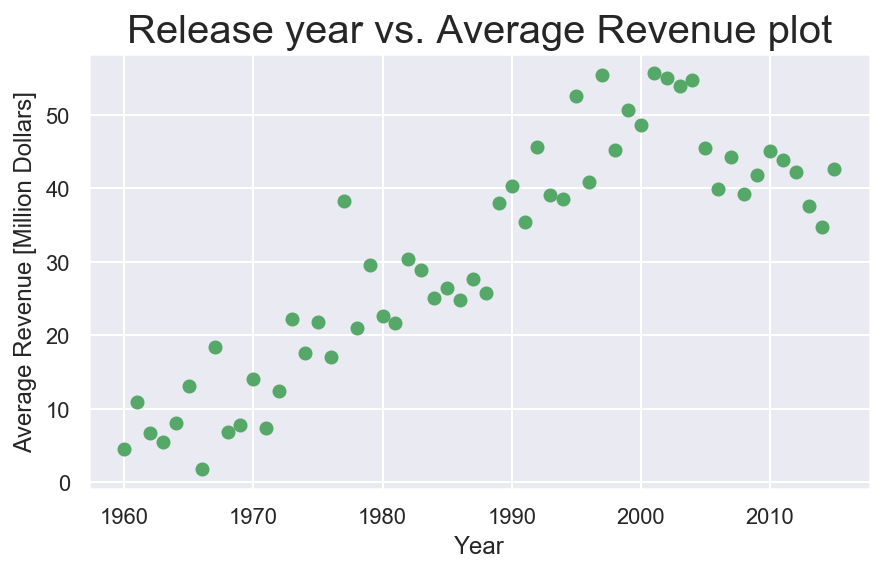

In [38]:
plt.figure(figsize=(7,4))
plt.plot(year, rev_mean/1e6, 'go') # plot and scale the rev_mean

plt.title("Release year vs. Average Revenue plot", fontsize = 20)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Revenue [Million Dollars]", fontsize = 12);

>looking at the mean revenue over years, it has been generally monotonically increasing. The has been a down grade in mean revenue around year 2005. This could be potentailly due to 2007 recession. 

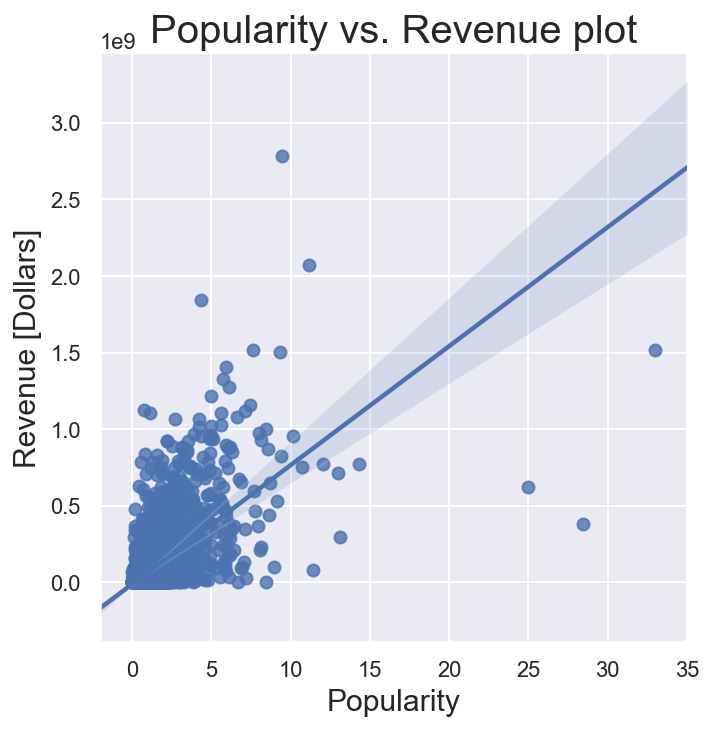

In [39]:
sns.lmplot(data = df, x = 'popularity', y = 'revenue') #plot using sns to also have a linear regresion trend

plt.title("Popularity vs. Revenue plot", fontsize = 20)
plt.xlabel("Popularity", fontsize = 15)
plt.ylabel("Revenue [Dollars]", fontsize = 15);

>It does look like that there is a correlation between the popularity and the revenue. The more popular the movies, the higher the revenue.

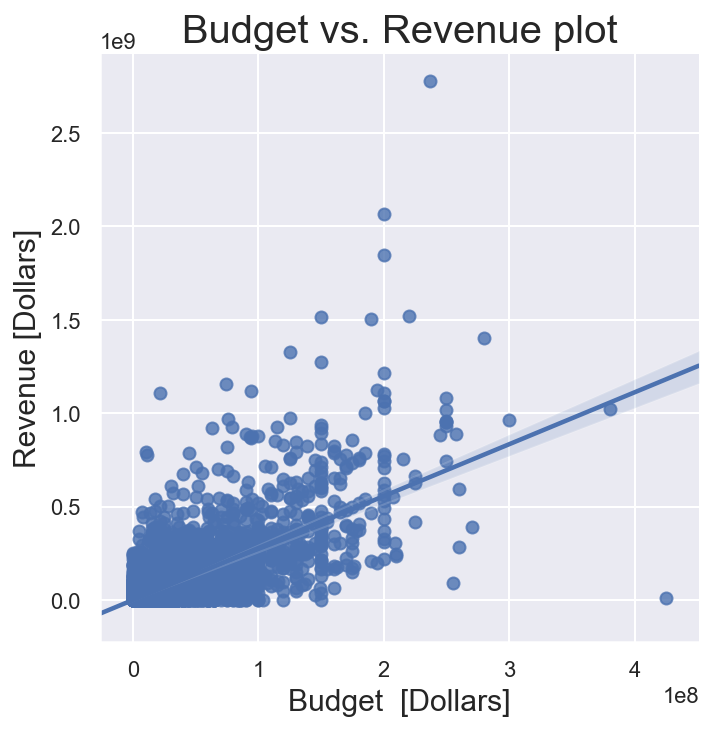

In [24]:
sns.lmplot(data = df, x = 'budget', y = 'revenue')

plt.title("Budget vs. Revenue plot", fontsize = 20)
plt.xlabel("Budget  [Dollars]", fontsize = 15)
plt.ylabel("Revenue [Dollars]", fontsize = 15);

>From the plot above, we can see a clear correlation between the budget spend with revenue. Below shows another plot just to confirm that the budget and revenue track each other.

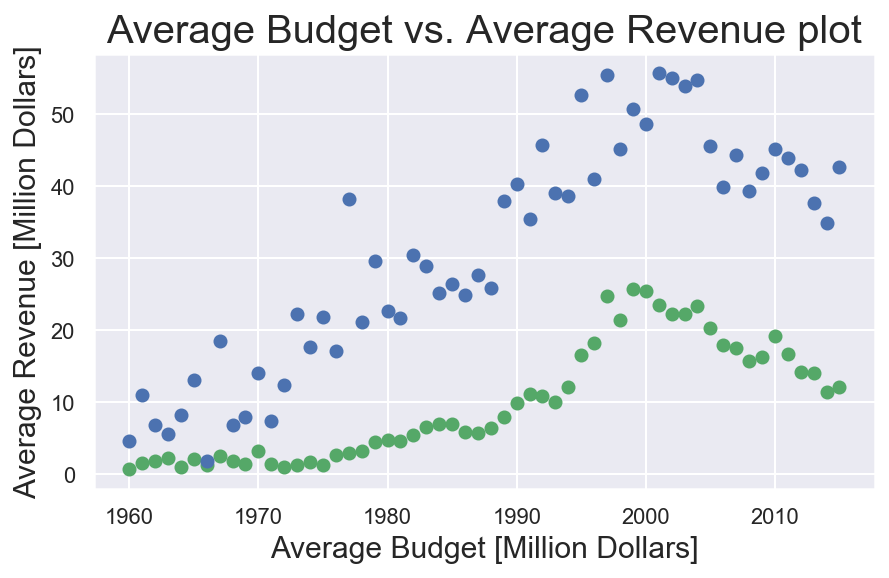

In [40]:
plt.figure(figsize=(7,4));
plt.plot(year, df.groupby('release_year')['budget'].mean()/1e6, 'go');
plt.plot(year, df.groupby('release_year')['revenue'].mean()/1e6, 'bo');

plt.title("Average Budget vs. Average Revenue plot", fontsize = 20)
plt.xlabel("Average Budget [Million Dollars]", fontsize = 15)
plt.ylabel("Average Revenue [Million Dollars]", fontsize = 15);

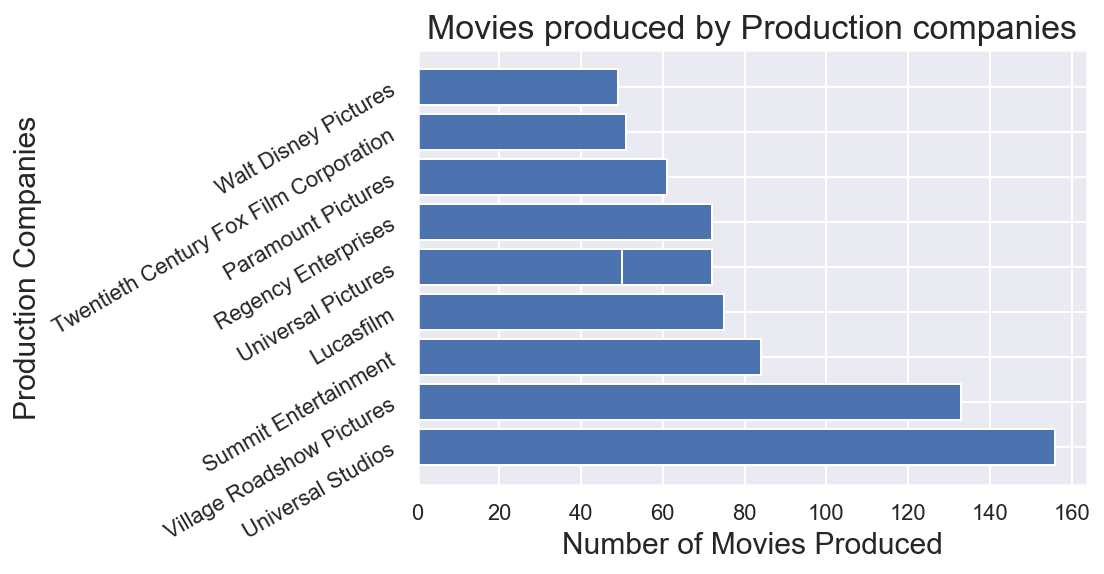

In [41]:
#Bar chart to present the various producers and theri experience

plt.barh(list(df.production_companies[:10].str.partition("|")[0]),df.production_companies.value_counts()[:10])

plt.yticks(rotation=30)
plt.title("Movies produced by Production companies", fontsize = 17)
plt.xlabel("Number of Movies Produced", fontsize = 15)
plt.ylabel("Production Companies", fontsize = 15);

> Based on the bar chart above that shows the first highest 10 production companies, Universal Studios is ranked one in having the most experience in movie production followed by "Village Roachshow Pictures" and "Summit Entertainment"

<a id='conclusions'></a>
## Conclusions

> In conclusions, I have looked at IMDB movie data. It is a rather large dataset however, analyzing part of it was interesting. I tried to mainly answer the following questions:

>1- Which genres are most popular from year to year? It turned out the Drama, Comedy and Thriller are the most popular and their popularity increase the most from year to year.
>
> 2- which kind of properties are associated with movies that have high revenues? Some properties like runtime, popularity and the budget affected the revenue numbers. 
>
>I Further looked at the number of movies produced by various production comapnies and it turned out "Universal Studios" have produced the most compared to other ones. If I were to make a movie, I would probably go to "Universal Studios" first since they probably have the most experience in movie production.